## Photometric error stage demo

author: Tianqing Zhang, John-Franklin Crenshaw

This notebook demonstrate the use of `rail.creation.degraders.photometric_errors`, which adds column for the  photometric noise to the catalog based on the package PhotErr developed by John-Franklin Crenshaw. The RAIL stage PhotoErrorModel inherit from the Noisifier base classes, and the LSST, Roman, Euclid child classes inherit from the PhotoErrorModel

In [1]:

from rail.creation.degraders.photometric_errors import LSSTErrorModel
from rail.creation.degraders.photometric_errors import RomanErrorModel
from rail.creation.degraders.photometric_errors import EuclidErrorModel

from rail.core.data import PqHandle
from rail.core.stage import RailStage

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np



### Create a random catalog with ugrizy+YJHF bands as the the true input

In [2]:
data = np.random.normal(23, 3, size = (1000,9))

data_df = pd.DataFrame(data=data,    # values
            columns=['u', 'g', 'r', 'i', 'z', 'y', 'Y', 'J', 'H'])
data_truth = PqHandle('input')
data_truth.set_data(data_df)

In [3]:
data_df

,u,g,r,i,z,y,Y,J,H
0,22.283572,22.749676,22.590637,20.800988,23.823371,22.620721,23.770262,21.487779,22.300283
1,17.676183,19.764627,16.116723,23.838367,18.620108,20.961477,25.676538,23.855940,21.291944
2,23.634059,23.597013,23.239329,23.801648,22.683263,22.155387,17.582310,19.813790,21.901738
3,16.041551,24.055683,20.460101,23.892970,28.859697,23.637676,25.927520,23.798175,22.798569
4,24.834584,18.874935,24.488038,21.507693,30.232566,18.195676,24.677051,27.580276,27.012927
...,...,...,...,...,...,...,...,...,...
995,25.846556,23.752223,25.186328,22.895239,23.670579,21.653523,20.454243,18.208783,22.330790
996,21.149865,17.019191,24.963789,22.473940,23.208825,21.871691,24.846249,20.284625,22.072060
997,26.675296,23.567440,28.642595,24.229864,21.570566,22.654743,25.206447,25.435396,23.432416
998,14.855351,27.271644,26.703449,24.775564,21.980500,19.109026,30.855122,22.821460,25.168137


### The LSST error model adds noise to the optical bands

In [4]:
errorModel_lsst = LSSTErrorModel.make_stage(name="error_model")

samples_w_errs = errorModel_lsst(data_truth)
samples_w_errs()


Inserting handle into data store.  input: None, error_model
Inserting handle into data store.  output_error_model: inprogress_output_error_model.pq, error_model


,u,u_err,g,g_err,r,r_err,i,i_err,z,z_err,y,y_err,Y,J,H
0,22.287475,0.011103,22.746445,0.007032,22.589729,0.006223,20.799607,0.005168,23.789964,0.034785,22.633928,0.028249,23.770262,21.487779,22.300283
1,17.680997,0.005020,19.754000,0.005028,16.119309,0.005000,23.841438,0.019253,18.613232,0.005021,20.949553,0.007896,25.676538,23.855940,21.291944
2,23.680379,0.034048,23.574978,0.011382,23.230437,0.008219,23.804863,0.018670,22.678714,0.013576,22.152971,0.018687,17.582310,19.813790,21.901738
3,16.043146,0.005004,24.054925,0.016473,20.464573,0.005045,23.899824,0.020228,27.640717,0.811551,23.673001,0.070840,25.927520,23.798175,22.798569
4,24.872396,0.096881,18.865605,0.005010,24.494207,0.020946,21.503803,0.005520,28.164712,1.118312,18.196044,0.005042,24.677051,27.580276,27.012927
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,25.505339,0.167250,23.742197,0.012877,25.137916,0.036719,22.893275,0.009359,23.641958,0.030534,21.648349,0.012468,20.454243,18.208783,22.330790
996,21.145000,0.006322,17.018865,0.005002,24.969229,0.031641,22.470508,0.007378,23.197389,0.020770,21.854222,0.014630,24.846249,20.284625,22.072060
997,27.314881,0.684607,23.560683,0.011266,28.593741,0.648838,24.211151,0.026448,21.565550,0.006843,22.635973,0.028300,25.206447,25.435396,23.432416
998,14.856820,0.005001,27.009479,0.213451,26.675701,0.142260,24.767433,0.043183,21.986693,0.008428,19.097416,0.005159,30.855122,22.821460,25.168137


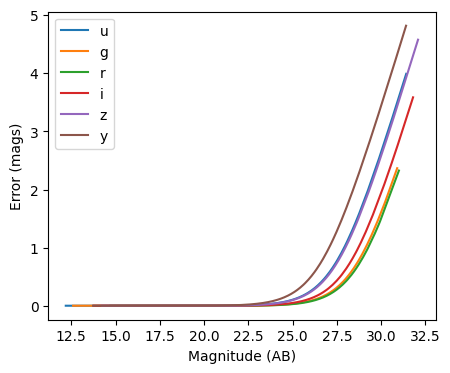

In [5]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)

for band in "ugrizy":
    # pull out the magnitudes and errors
    mags = samples_w_errs.data[band].to_numpy()
    errs = samples_w_errs.data[band + "_err"].to_numpy()

    # sort them by magnitude
    mags, errs = mags[mags.argsort()], errs[mags.argsort()]

    # plot errs vs mags
    ax.plot(mags, errs, label=band)

ax.legend()
ax.set(xlabel="Magnitude (AB)", ylabel="Error (mags)")
plt.show()


### The Roman error model adds noise to the infrared bands

In [6]:
errorModel_Roman = RomanErrorModel.make_stage(name="error_model", )



In [7]:
errorModel_Roman.config['m5']['Y'] = 27.0

In [8]:
errorModel_Roman.config['theta']['Y'] = 27.0

In [9]:
samples_w_errs_roman = errorModel_Roman(data_truth)
samples_w_errs_roman()

Inserting handle into data store.  input: None, error_model
Inserting handle into data store.  output_error_model: inprogress_output_error_model.pq, error_model


,u,g,r,i,z,y,Y,Y_err,J,J_err,H,H_err
0,22.283572,22.749676,22.590637,20.800988,23.823371,22.620721,23.789251,0.012277,21.491889,0.005527,22.290190,0.007007
1,17.676183,19.764627,16.116723,23.838367,18.620108,20.961477,25.706408,0.064218,23.836832,0.020889,21.300125,0.005375
2,23.634059,23.597013,23.239329,23.801648,22.683263,22.155387,17.587365,0.005000,19.817913,0.005025,21.902314,0.006067
3,16.041551,24.055683,20.460101,23.892970,28.859697,23.637676,25.919138,0.077562,23.750592,0.019401,22.807011,0.009345
4,24.834584,18.874935,24.488038,21.507693,30.232566,18.195676,24.659506,0.025347,27.864045,0.620113,26.584966,0.231092
...,...,...,...,...,...,...,...,...,...,...,...,...
995,25.846556,23.752223,25.186328,22.895239,23.670579,21.653523,20.446518,0.005027,18.211781,0.005001,22.332548,0.007145
996,21.149865,17.019191,24.963789,22.473940,23.208825,21.871691,24.852045,0.030027,20.285200,0.005060,22.060577,0.006387
997,26.675296,23.567440,28.642595,24.229864,21.570566,22.654743,25.137249,0.038676,25.538788,0.094160,23.404135,0.014540
998,14.855351,27.271644,26.703449,24.775564,21.980500,19.109026,inf,inf,22.826941,0.009468,25.149932,0.066752


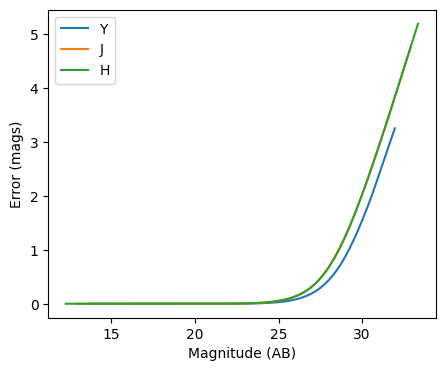

In [10]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)

for band in "YJH":
    # pull out the magnitudes and errors
    mags = samples_w_errs_roman.data[band].to_numpy()
    errs = samples_w_errs_roman.data[band + "_err"].to_numpy()

    # sort them by magnitude
    mags, errs = mags[mags.argsort()], errs[mags.argsort()]

    # plot errs vs mags
    ax.plot(mags, errs, label=band)

ax.legend()
ax.set(xlabel="Magnitude (AB)", ylabel="Error (mags)")
plt.show()


### The Euclid error model adds noise to YJH bands

In [11]:
errorModel_Euclid = EuclidErrorModel.make_stage(name="error_model")

samples_w_errs_Euclid = errorModel_Euclid(data_truth)
samples_w_errs_Euclid()

Inserting handle into data store.  input: None, error_model
Inserting handle into data store.  output_error_model: inprogress_output_error_model.pq, error_model


,u,g,r,i,z,y,Y,Y_err,J,J_err,H,H_err
0,22.283572,22.749676,22.590637,20.800988,23.823371,22.620721,23.831948,0.132736,21.469980,0.014146,22.308227,0.031558
1,17.676183,19.764627,16.116723,23.838367,18.620108,20.961477,25.146678,0.393067,23.982727,0.127192,21.271543,0.013084
2,23.634059,23.597013,23.239329,23.801648,22.683263,22.155387,17.580052,0.005020,19.813657,0.005774,21.912940,0.022309
3,16.041551,24.055683,20.460101,23.892970,28.859697,23.637676,inf,inf,23.753518,0.104141,22.753905,0.046912
4,24.834584,18.874935,24.488038,21.507693,30.232566,18.195676,24.644190,0.263471,25.695851,0.511456,25.930346,0.649459
...,...,...,...,...,...,...,...,...,...,...,...,...
995,25.846556,23.752223,25.186328,22.895239,23.670579,21.653523,20.464008,0.008055,18.209530,0.005043,22.315224,0.031754
996,21.149865,17.019191,24.963789,22.473940,23.208825,21.871691,24.735763,0.283859,20.288787,0.006708,22.065362,0.025478
997,26.675296,23.567440,28.642595,24.229864,21.570566,22.654743,26.050010,0.753874,26.278636,0.768298,23.439106,0.086241
998,14.855351,27.271644,26.703449,24.775564,21.980500,19.109026,inf,inf,22.821355,0.045570,25.376327,0.434105


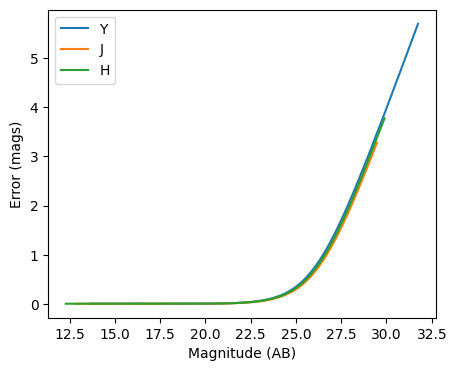

In [12]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)

for band in "YJH":
    # pull out the magnitudes and errors
    mags = samples_w_errs_Euclid.data[band].to_numpy()
    errs = samples_w_errs_Euclid.data[band + "_err"].to_numpy()

    # sort them by magnitude
    mags, errs = mags[mags.argsort()], errs[mags.argsort()]

    # plot errs vs mags
    ax.plot(mags, errs, label=band)

ax.legend()
ax.set(xlabel="Magnitude (AB)", ylabel="Error (mags)")
plt.show()
